<a href="https://colab.research.google.com/github/Armin-Abdollahi/Attention-Mechanism/blob/main/Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The **Soft Attention mechanism** is a type of attention that allows the model to focus on different parts of the input for each step of the output.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SoftAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SoftAttention, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.attention = nn.Linear(self.input_dim + self.hidden_dim, 1)

    def forward(self, encoder_outputs, hidden):
        # Concatenate the hidden state with each encoder output
        hidden = hidden.repeat(encoder_outputs.size(0), 1, 1).transpose(0, 1)
        encoder_outputs = encoder_outputs.transpose(0, 1)  # [batch_size, seq_len, features]
        merged = torch.cat((hidden, encoder_outputs), 2)

        # Apply the attention layer to get the attention scores
        attention_scores = self.attention(merged).squeeze(2)
        attention_scores = F.softmax(attention_scores, dim=1)

        # Multiply the scores by the encoder outputs to get the weighted sum
        context_vector = torch.bmm(attention_scores.unsqueeze(1), encoder_outputs).squeeze(1)
        return context_vector, attention_scores

# Example usage:
# Define the dimensions
input_dim = 128  # Size of the encoder output feature vector
hidden_dim = 256  # Size of the decoder hidden state

# Create the SoftAttention layer
attention_layer = SoftAttention(input_dim, hidden_dim)

# Assume some random encoder outputs and hidden state
encoder_outputs = torch.randn(10, 32, input_dim)  # [seq_len, batch_size, features]
hidden = torch.randn(32, hidden_dim)  # [batch_size, hidden_dim]

# Get the context vector and attention scores
context_vector, attention_scores = attention_layer(encoder_outputs, hidden)

implements a simple Soft Attention mechanism on the CIFAR-10 dataset using Keras


This code defines a simple CNN with a Soft Attention mechanism that applies a learned mask to the feature maps of the convolutional layer, allowing the network to focus on the most relevant parts of the image for classification.

170498071/170498071 [==============================] - 7s 0us/step
Epoch 1/10
782/782 [==============================] - 20s 13ms/step - loss: 1.4037 - accuracy: 0.4983 - val_loss: 1.0908 - val_accuracy: 0.6165
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0117 - accuracy: 0.6457 - val_loss: 0.9708 - val_accuracy: 0.6581
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8494 - accuracy: 0.7023 - val_loss: 0.9298 - val_accuracy: 0.6684
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7267 - accuracy: 0.7473 - val_loss: 0.8321 - val_accuracy: 0.7118
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.6086 - accuracy: 0.7878 - val_loss: 0.8187 - val_accuracy: 0.7247
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4923 - accuracy: 0.8281 - val_loss: 0.8658 - val_accuracy: 0.7246
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.385

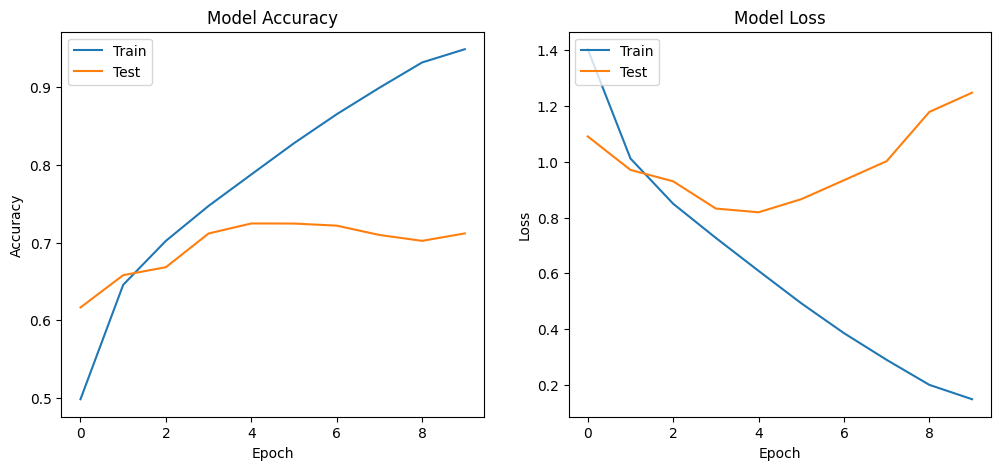

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, multiply
from keras.utils import to_categorical
from keras.callbacks import History

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Soft Attention module
def soft_attention(activation_layer):
    attention = Conv2D(1, (1, 1), padding='same')(activation_layer)
    attention = Activation('sigmoid')(attention)
    return multiply([activation_layer, attention])

# Model architecture
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = soft_attention(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = History()
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[history])

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

100%|██████████| 170498071/170498071 [00:02<00:00, 63010735.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1, Loss: 1.5380714183573223, Accuracy: 0.46614
Epoch 2, Loss: 1.0402756084871414, Accuracy: 0.64436
Epoch 3, Loss: 0.8362465686048083, Accuracy: 0.7132
Epoch 4, Loss: 0.7006982396478239, Accuracy: 0.76052
Epoch 5, Loss: 0.6053332191751436, Accuracy: 0.79166
Epoch 6, Loss: 0.5252599795456128, Accuracy: 0.8174
Epoch 7, Loss: 0.4598192646718391, Accuracy: 0.8415
Epoch 8, Loss: 0.4077610952012679, Accuracy: 0.85978
Epoch 9, Loss: 0.36776207850488557, Accuracy: 0.87156
Epoch 10, Loss: 0.3312944541673374, Accuracy: 0.88546


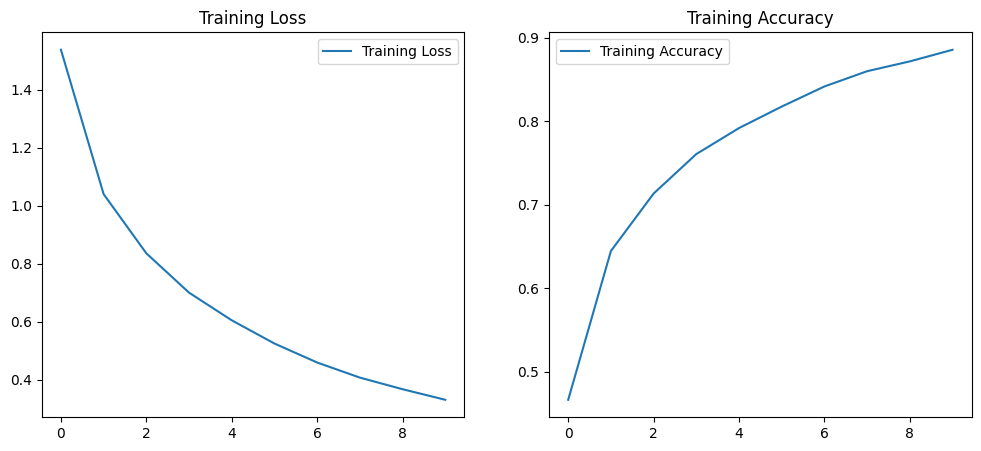

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Soft Attention mechanism
class SoftAttention(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(SoftAttention, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.softmax = nn.Softmax(dim=2)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)

    def forward(self, x):
        attention = self.conv1(x)
        attention = self.softmax(attention.view(*attention.size()[:2], -1)).view_as(attention)
        x = self.conv2(x)
        return x * attention

# Define the Soft Attention Model
class SoftAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(SoftAttentionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.attention1 = SoftAttention(32, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32 * 16 * 16, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.attention1(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = SoftAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

Implementing Soft Attention on the CIFAR-100 dataset involves creating a neural network model that incorporates attention mechanisms to focus on specific features of the input images.

This code defines a SoftAttention module that applies two convolutional layers followed by a softmax function to create an attention map. This map is then element-wise multiplied with the input feature map to apply the attention. The AttentionCNN class integrates this attention module into a simple CNN architecture for image classification.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the Soft Attention module
class SoftAttention(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(SoftAttention, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        attention = self.conv1(x)
        attention = self.conv2(attention)
        attention = self.softmax(attention)
        return x * attention

# Define the CNN with Soft Attention
class AttentionCNN(nn.Module):
    def __init__(self):
        super(AttentionCNN, self).__init__()
        self.attention_layer = SoftAttention(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)
        self.conv_layer = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.fc_layer = nn.Linear(64 * 32 * 32, 100)  # Assuming the input size is 32x32x3

    def forward(self, x):
        x = self.attention_layer(x)
        x = F.relu(self.conv_layer(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = self.fc_layer(x)
        return x

# Load CIFAR-100 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model and optimizer
model = AttentionCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to track loss and accuracy
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(10):  # Number of epochs
    total_loss = 0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/10], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/10], Average Loss: {avg_loss}, Accuracy: {accuracy}')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

100%|██████████| 169001437/169001437 [00:14<00:00, 11830815.46it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Epoch [1/10], Step [100/782], Loss: 3.6657814979553223
Epoch [1/10], Step [200/782], Loss: 3.672008514404297
Epoch [1/10], Step [300/782], Loss: 3.6820571422576904
Epoch [1/10], Step [400/782], Loss: 3.690927267074585
Epoch [1/10], Step [500/782], Loss: 3.171823740005493
Epoch [1/10], Step [600/782], Loss: 3.190908908843994
Epoch [1/10], Step [700/782], Loss: 3.2048287391662598
Epoch [1/10], Average Loss: 3.613858416257307, Accuracy: 0.20306
Epoch [2/10], Step [100/782], Loss: 2.542163848876953
Epoch [2/10], Step [200/782], Loss: 2.4259846210479736
Epoch [2/10], Step [300/782], Loss: 2.634690999984741
Epoch [2/10], Step [400/782], Loss: 2.832771062850952
Epoch [2/10], Step [500/782], Loss: 2.484659433364868
Epoch [2/10], Step [600/782], Loss: 2.316042184829712
Epoch [2/10], Step [700/782], Loss: 2.4648501873016357
Epoch [2/10], Average Loss: 2.55080457736769, Accuracy: 0.38164
Epoch [3/10], Step [100/782], Loss: 1.62590491771698
Epoch

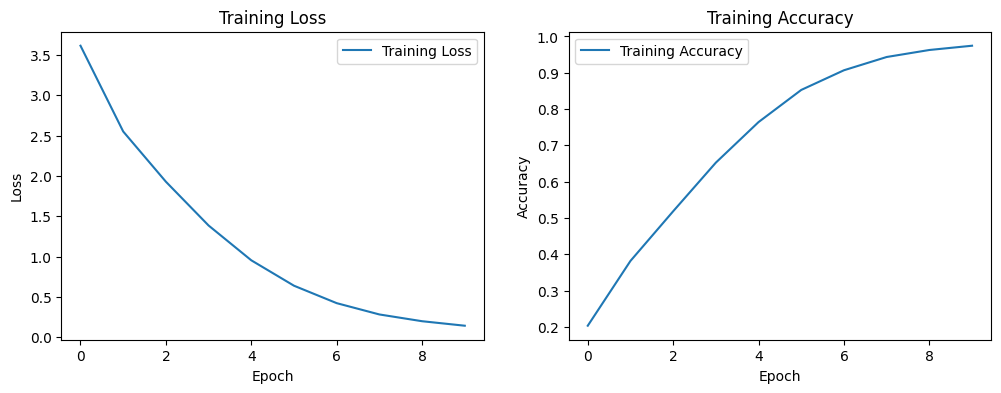

In [ ]:
# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Hard-Attention

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the Hard Attention Model
class HardAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(HardAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        # Simulate hard attention by selecting a random patch
        patch_size = 16  # Size of the patch to focus on
        batch_size, _, height, width = x.shape
        start_x = np.random.randint(0, height - patch_size)
        start_y = np.random.randint(0, width - patch_size)
        x = x[:, :, start_x:start_x+patch_size, start_y:start_y+patch_size]
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = HardAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

#### **Hard attention mechanisms** selectively focus on certain parts of the input data while ignoring the rest, which is different from soft attention that considers all parts with varying weights.

In [ ]:
import numpy as np

def hard_attention(query, keys, values):
    """
    Implements a simple hard attention mechanism.

    Parameters:
    query (ndarray): The query vector.
    keys (ndarray): The key vectors.
    values (ndarray): The value vectors.

    Returns:
    ndarray: The context vector after applying hard attention.
    """
    # Calculate the dot product between the query and the keys
    attention_scores = np.dot(query, keys.T)

    # Find the index of the maximum score (hard attention)
    max_index = np.argmax(attention_scores)

    # Select the value vector corresponding to the maximum score
    context_vector = values[max_index]

    return context_vector

# Example usage:
query = np.array([1, 0, 0])
keys = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
values = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

context = hard_attention(query, keys, values)
print("Context Vector:", context)

Implementing Hard Attention on the CIFAR-10 dataset involves several steps, including defining the attention mechanism, integrating it with a neural network model, training the model, and plotting the results.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Lambda
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the Hard Attention mechanism
def hard_attention(x):
    # Placeholder function for the hard attention mechanism
    # In practice, this would select specific regions of the input image
    return x

# Build the model with the Hard Attention layer
input_layer = Input(shape=(32, 32, 3))
attention_layer = Lambda(hard_attention)(input_layer)
conv_layer = Conv2D(32, (3, 3), activation='relu')(attention_layer)
flattened_layer = Flatten()(conv_layer)
output_layer = Dense(10, activation='softmax')(flattened_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Code uses PyTorch to implement a simple Self Attention mechanism on the CIFAR-10 dataset.

The self-attention mechanism is integrated into a CNN for image classification

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.388213495540497, Accuracy: 0.4961
Epoch 2, Loss: 1.0650326768912928, Accuracy: 0.62666
Epoch 3, Loss: 0.9610405740378153, Accuracy: 0.66268
Epoch 4, Loss: 0.8865628090813337, Accuracy: 0.69166
Epoch 5, Loss: 0.8351323302749478, Accuracy: 0.71132
Epoch 6, Loss: 0.7982977725889372, Accuracy: 0.72274
Epoch 7, Loss: 0.7684148010390494, Accuracy: 0.73324
Epoch 8, Loss: 0.7428642534996237, Accuracy: 0.7422
Epoch 9, Loss: 0.7191464038532408, Accuracy: 0.75082
Epoch 10, Loss: 0.7026269469419708, Accuracy: 0.75578


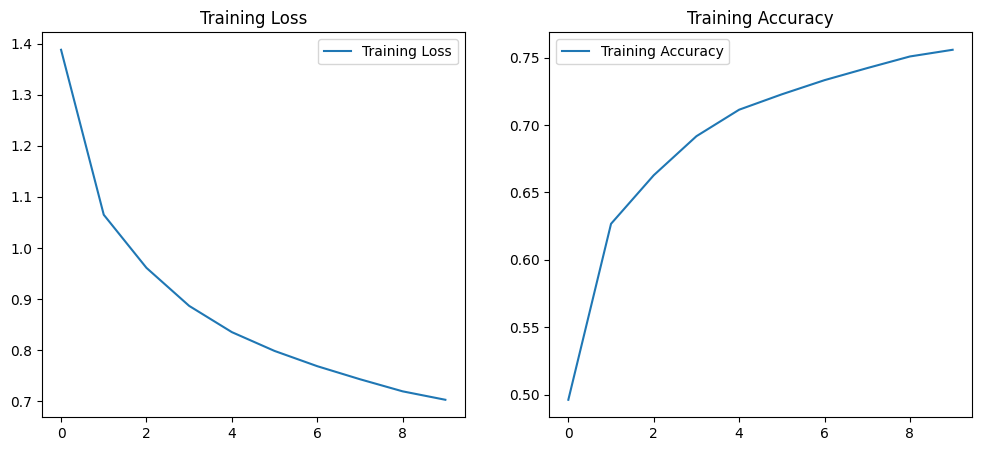

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Self-Attention Model
class SelfAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(SelfAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Self-attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SelfAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.997
[1,  4000] loss: 1.759
[1,  6000] loss: 1.594
[1,  8000] loss: 1.509
[1, 10000] loss: 1.444
[1, 12000] loss: 1.402
[2,  2000] loss: 1.330
[2,  4000] loss: 1.304
[2,  6000] loss: 1.291
[2,  8000] loss: 1.264
[2, 10000] loss: 1.263
[2, 12000] loss: 1.271
[3,  2000] loss: 1.206
[3,  4000] loss: 1.200
[3,  6000] loss: 1.177
[3,  8000] loss: 1.187
[3, 10000] loss: 1.151
[3, 12000] loss: 1.136
[4,  2000] loss: 1.092
[4,  4000] loss: 1.099
[4,  6000] loss: 1.090
[4,  8000] loss: 1.083
[4, 10000] loss: 1.081
[4, 12000] loss: 1.099
[5,  2000] loss: 1.057
[5,  4000] loss: 1.025
[5,  6000] loss: 1.039
[5,  8000] loss: 1.026
[5, 10000] loss: 1.031
[5, 12000] loss: 1.046
[6,  2000] loss: 0.989
[6,  4000] loss: 0.983
[6,  6000] loss: 0.979
[6,  8000] loss: 0.986
[6, 10000] loss: 0.984
[6, 12000] loss: 1.010
[7,  2000] loss: 0.948
[7,  4000] loss: 0.968
[7,  6000] loss: 0.936
[7,  8000] loss: 0.965
[7, 

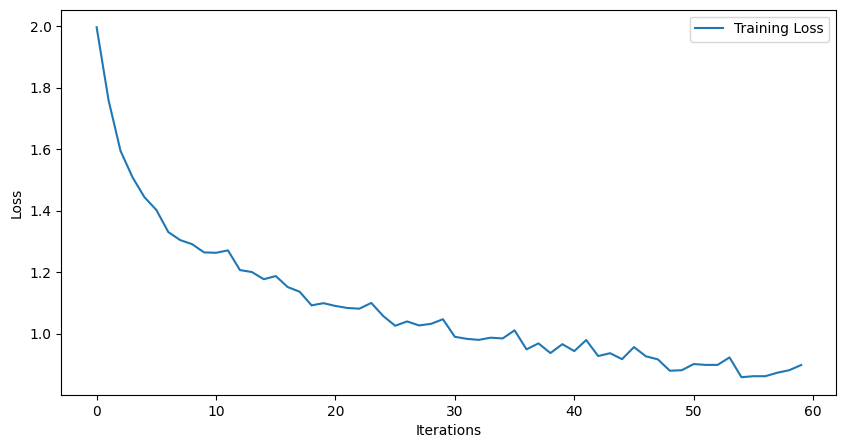

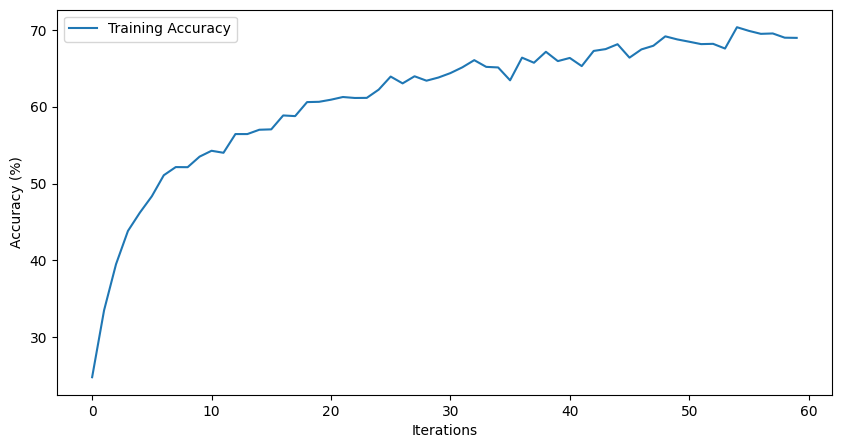

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Self-Attention module
class SelfAttention(nn.Module):
    def __init__(self, k, heads):
        super().__init__()
        self.k, self.heads = k, heads
        self.tokeys = nn.Linear(k, k * heads, bias=False)
        self.toqueries = nn.Linear(k, k * heads, bias=False)
        self.tovalues = nn.Linear(k, k * heads, bias=False)
        self.unifyheads = nn.Linear(heads * k, k)

    def forward(self, x):
        b, t, k = x.size()
        h = self.heads
        queries = self.toqueries(x).view(b, t, h, k)
        keys = self.tokeys(x).view(b, t, h, k)
        values = self.tovalues(x).view(b, t, h, k)
        keys = keys.transpose(1, 2).contiguous().view(b * h, t, k)
        queries = queries.transpose(1, 2).contiguous().view(b * h, t, k)
        values = values.transpose(1, 2).contiguous().view(b * h, t, k)
        queries = queries / (k ** (1/4))
        keys = keys / (k ** (1/4))
        dot = torch.bmm(queries, keys.transpose(1, 2))
        dot = F.softmax(dot, dim=2)
        out = torch.bmm(dot, values).view(b, h, t, k)
        out = out.transpose(1, 2).contiguous().view(b, t, h * k)
        return self.unifyheads(out)

# Define the CNN with Self-Attention
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.k = 64  # Define k here, which is the number of features expected by the SelfAttention module
        self.heads = 4  # Define the number of heads for the SelfAttention module
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, self.k, 3, padding=1)  # Use self.k here
        self.pool = nn.MaxPool2d(2, 2)
        self.attention = SelfAttention(k=self.k, heads=self.heads)
        self.fc1 = nn.Linear(self.k * 8 * 8, 512)  # Adjust the input features to match the output of the attention layer
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1, self.k)  # Reshape x to have the correct dimensions
        x = self.attention(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load and normalize the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Initialize the network and define loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Initialize lists to track loss and accuracy
train_losses = []
train_accuracies = []

# Train the network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            train_losses.append(running_loss / 2000)
            train_accuracies.append(100 * correct / total)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

Multi-Head Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.388708739024599, Accuracy: 0.49996
Epoch 2, Loss: 1.0593447393316138, Accuracy: 0.62832
Epoch 3, Loss: 0.9591418784445204, Accuracy: 0.66386
Epoch 4, Loss: 0.8955630900152504, Accuracy: 0.68798
Epoch 5, Loss: 0.8430965941427918, Accuracy: 0.7085
Epoch 6, Loss: 0.8101945812135096, Accuracy: 0.72082
Epoch 7, Loss: 0.7788937692065983, Accuracy: 0.72982
Epoch 8, Loss: 0.7500917858937207, Accuracy: 0.73962
Epoch 9, Loss: 0.7272411613436915, Accuracy: 0.74718
Epoch 10, Loss: 0.7067726449588375, Accuracy: 0.75192


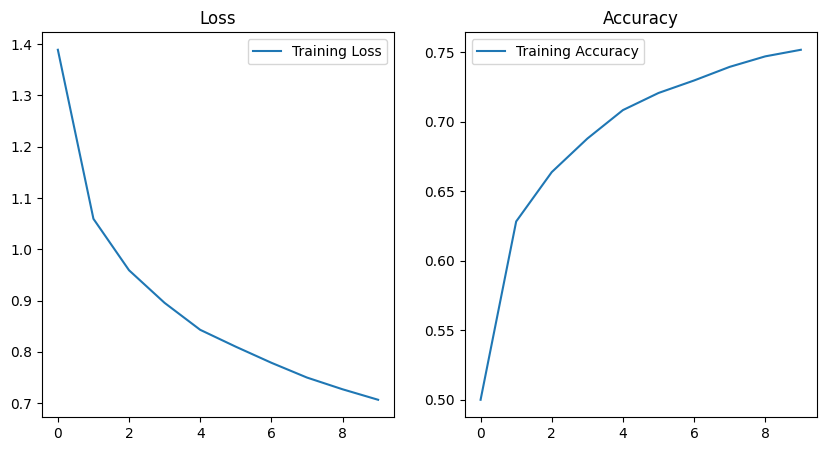

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# Define the Multi-Head Attention Model
class MultiHeadAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(MultiHeadAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Multi-head attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MultiHeadAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
def plot_graphs(train_losses, train_accuracies):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.show()

plot_graphs(train_losses, train_accuracies)

Cross-Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.4480547299013113, Accuracy: 0.47876
Epoch 2, Loss: 1.0788353255490208, Accuracy: 0.62112
Epoch 3, Loss: 0.9415935060709638, Accuracy: 0.6714
Epoch 4, Loss: 0.8513014424792336, Accuracy: 0.703
Epoch 5, Loss: 0.7882771521349392, Accuracy: 0.72514
Epoch 6, Loss: 0.7398536855073841, Accuracy: 0.74272
Epoch 7, Loss: 0.7007633386670477, Accuracy: 0.75606
Epoch 8, Loss: 0.6594322452231136, Accuracy: 0.7712
Epoch 9, Loss: 0.6251986601468548, Accuracy: 0.78028
Epoch 10, Loss: 0.5944548387966497, Accuracy: 0.79234


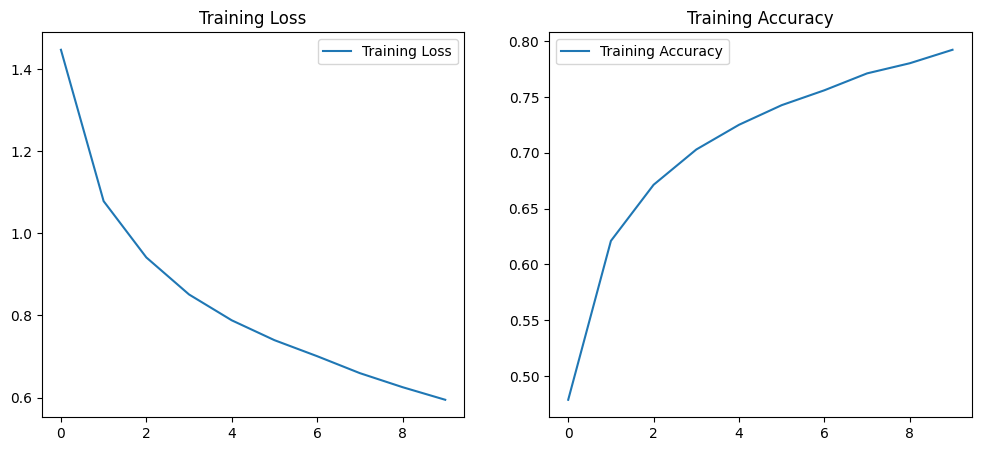

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Cross-Attention Model
class CrossAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CrossAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Cross-attention layer
        self.cross_attn = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        # Flatten and transpose for cross-attention
        x = x.view(x.size(0), -1, 64).transpose(0, 1)
        attn_output, _ = self.cross_attn(x, x, x)
        x = attn_output.transpose(0, 1).contiguous().view(x.size(1), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CrossAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

Causal Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.3966997682743365, Accuracy: 0.5008
Epoch 2, Loss: 1.0668870429401203, Accuracy: 0.62386
Epoch 3, Loss: 0.9669093106256421, Accuracy: 0.66018
Epoch 4, Loss: 0.9028147925501284, Accuracy: 0.68348
Epoch 5, Loss: 0.8533293312925208, Accuracy: 0.70396
Epoch 6, Loss: 0.8204418852963411, Accuracy: 0.7149
Epoch 7, Loss: 0.7837299803638702, Accuracy: 0.72756
Epoch 8, Loss: 0.7575159547731395, Accuracy: 0.7354
Epoch 9, Loss: 0.7382098676832131, Accuracy: 0.74488
Epoch 10, Loss: 0.7148826361998267, Accuracy: 0.75222


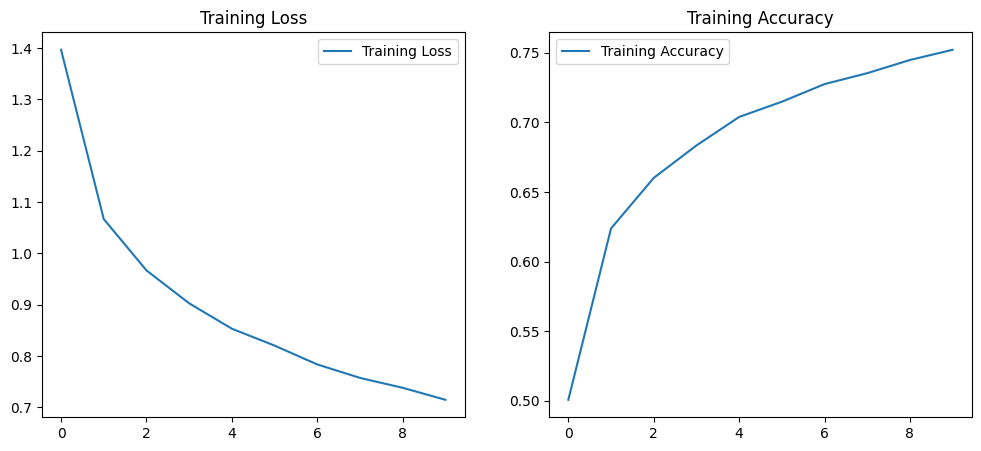

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Attention Model
class AttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(AttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = AttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

### Implement a simple **Squeeze-and-Excitation (SE) attention** module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        # Define the squeeze operation
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        # Define the excitation operations
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        # Squeeze operation
        y = self.avg_pool(x).view(b, c)
        # Excitation operation
        y = self.fc(y).view(b, c, 1, 1)
        # Scale the input with the attention weights
        return x * y.expand_as(x)

# Example usage
# Define the input tensor with batch size 2, 64 channels, and 32x32 spatial dimensions
input_tensor = torch.randn(2, 64, 32, 32)
# Create the SE attention layer for 64 channels
se_layer = SELayer(channel=64)
# Forward pass to obtain the output with attention applied
output_tensor = se_layer(input_tensor)

print(output_tensor.shape)  # Expected shape: [2, 64, 32, 32]

torch.Size([2, 64, 32, 32])


a high-level overview of how you can implement various attention mechanisms in Python, particularly useful for EEG signal processing and other machine learning tasks:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Soft Attention
class SoftAttention(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(SoftAttention, self).__init__()
        self.attention_weights = nn.Linear(input_dim, attention_dim)
        self.context_vector = nn.Linear(attention_dim, 1, bias=False)

    def forward(self, inputs):
        # Compute attention scores
        attention_scores = F.tanh(self.attention_weights(inputs))
        attention_scores = self.context_vector(attention_scores).squeeze(2)

        # Apply softmax to get attention distribution
        attention_weights = F.softmax(attention_scores, dim=1)

        # Compute weighted sum of inputs
        weighted_sum = torch.bmm(attention_weights.unsqueeze(1), inputs).squeeze(1)
        return weighted_sum, attention_weights

# Hard Attention (Stochastic and not differentiable, usually implemented using Reinforcement Learning)

# Self-Attention (Also known as Intra-Attention)
class SelfAttention(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(SelfAttention, self).__init__()
        self.query = nn.Linear(input_dim, attention_dim)
        self.key = nn.Linear(input_dim, attention_dim)
        self.value = nn.Linear(input_dim, attention_dim)

    def forward(self, inputs):
        Q = self.query(inputs)
        K = self.key(inputs)
        V = self.value(inputs)

        # Compute scaled dot-product attention
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(K.size(-1), dtype=torch.float32))
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply attention weights to values
        output = torch.matmul(attention_weights, V)
        return output, attention_weights

# Multi-Head Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, input_dim, num_heads, attention_dim):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.attention_dim = attention_dim
        self.heads = nn.ModuleList([SelfAttention(input_dim, attention_dim) for _ in range(num_heads)])

    def forward(self, inputs):
        head_outputs = [head(inputs)[0] for head in self.heads]
        concatenated = torch.cat(head_outputs, dim=2)
        return concatenated

# Cross-Attention, Causal Attention, Global vs. Local Attention
# These can be implemented similarly to Self-Attention with modifications to the attention mask or the range of attention.



This code provides a starting point for implementing different attention mechanisms. For EEG signal processing, you might need to adjust the input dimensions and possibly incorporate domain-specific knowledge into the attention mechanisms. Remember, the actual implementation details can vary based on the specific requirements of your task and the architecture of your neural network.

For Cross-Attention, you would modify the self-attention mechanism to take two different inputs, one serving as queries and the other as keys and values. Causal Attention restricts the attention to only consider previous time steps, which is crucial for tasks like time-series forecasting. Global vs. Local Attention refers to whether the attention mechanism considers all parts of the input sequence (global) or only a subset (local), which can be implemented by modifying the attention mask or using convolutions to restrict the receptive field.

Please note that for Hard Attention, due to its stochastic nature, it’s often implemented using reinforcement learning techniques or with approximations that allow for backpropagation, such as the Gumbel-Softmax trick.